# **Jupyter Notebooks**

## 1. Navigating through GeoAnalytics Canada JupyterHub

JupyterHub provides support for many users in a notebook servers space. Users have access to computational environments without requiring any installations on their local computers, everything can be run in the cloud. Jupyter-lab allows for interactive, scalable data analysis and visualizations, where the code and narrative texts can be mixed in the notebook while being in the same location as the data.

In order to provide scalable big data analytics, the system’s Jupyter-Lab environment is based on what is known as a **“Pangeo environment”**.  The core software packages that make up the Jupyter environment include:

* Xarray – provides an N-Dimensional Array interface and toolset
* Iris – provides methods for analysing and visualising meteorological and oceanographic datasets
* Dask – provides flexible parallel computing for analytics
* Zarr – the next generation, cloud-native file format for gridded datasets
* Jupyter-Lab – provides the web application framework for interactive analytics

Using these core packages, especially Xarray and Dask, scalable big data analytics can be executed on satellite EO data. Our JupyterLab is configured to allow direct access to scalable processing power and all EO and ground-truth datasets. 


To get started with your project, select the ***Jupyter*** tool from the main page on your GEOAnalytics Canada platform. This will lead you to your JupyterHub interface. 

<img src="../images/getting_started_images/02_launching-jupyterlab.gif">

**The main workspace consists of:**

- the launcher tab at start-up where you can work with Jupyter notebooks, Jupyter consoles, terminal, and text or markdown files
- the file browser containing the folders and files accessible for you.
- the plus sign in the top left activates a new launcher tab.

**The left sidebar contains:**

- a file browser
- the list of running kernels and terminals 
- the Dask dashboard (which will not be of use for us because it does not support Dask Gateway) 
- the command palette
- the notebook cell tools inspector
- the tabs list
- the extension manager.

<img src="../images/getting_started_images/02_jupyter-platform.png">


### 1.1 Launching New Notebooks
Within the Launcher tab, there are two environments to choose from. The *Python 3* environment and the *Python [conda env:notebook]* are both the same environments. These environments are created specifically for EO analysis, with essential packages already installed.

Let's create a notebook with either the *conda notebook environment* and begin writing some code!

<img src="../images/getting_started_images/02_launching-notebook.gif">


### 1.2 Launching Terminal
To start a new terminal session, click the terminal in the Launcher tab. Terminal provides full support for all system shells on Mac, Linux, and Windows. Just like the shell on your local system, anything can be run with this server terminal.

<img src="../images/getting_started_images/02_terminal.png">

Closing a running terminal will not shut down the terminal, rather it will continue running in the background. In the "Running Terminals and Kernels" tab, you can reopen a closed terminal, or completely shut the terminal down. 


<img src="../images/getting_started_images/02_exiting-terminal.gif">

***NOTE: Sudo / Root access is not available from the Jupyterlab environment's terminal.***

## 2. Location of the GEOAnalytics folders

As you can see in the file browser tab, there are 2 folders provided as default. There are two different type of folders available in the GEOAnalytics JupyterLab platform:

- **Private Mounted Buckets**: Folders available only if you have GEOAnalytics Platform access. 
    - `geoanalytics_user_shared_data` - All platform EO data collections including raw datasets and pre-processed datasets. *All users can read and write to this location.*
- **Personal Storage**
    - `geoanalytics_<username>` - A user’s personal network file system where only the logged in user can *read or write* to their own personal storage directory.


## 3. How the Jupyter environment is set up

### 3.1 Conda and Pip
A conda environment is a directory containing the specific collection of conda packages installed. The primary anaconda environment set up in our JupyterLab is called the "conda env:notebook" with all the packages from the *environment.yml* file installed. 

Here are a few useful commands you can use in terminal to understand the anaconda environment better:

- To check the current versions of packages/softwares: `<package/software name> --version`
    - for example, `pip --version`
- To find the information about the conda environment you are currently residing in: `conda info`
- To list all the packages downloaded in the environment: `conda list`
- To list modules installed with pip (very useful for debugging purposes): `pip freeze`
- To find all the versions of a package available for download: `conda search <package name>`
- To know all the conda commands available: `conda --help`


**Pip** is a Python tool for installing packages from PyPI (Python Package Index) as wheels or source distributions.

**Conda** is a package and environment management system for installing and managing packages from the Anaconda system. While pip only installs *Python* packages, conda can install packages of any programming language. 

**Which one is better?**
Both, pip and conda, are ideal at handling different things. Pip is better for installing python packages since pip obtains these packages faster, while it is adopted by conda much later. Conda is great at installing packages within a conda environment and managing dependencies, with the flexibility of working with other languages. 

**Can both package managers be used?**
Fortunately, conda and pip can coexist. But there are a few guidelines to keep your working environment clean and to avoid conflicts:

* Best approach is to install using pip only *after* all the other required packages have been satisfied by conda. 
* Use isolated conda environments, try not to work in the core root environment to avoid issues. Creating conda environments with only the packages you need makes it easy to maintain. 
* After installing pip packages in conda environment, conda is unaware of these changes. So, if you must install additional packages using conda, recreate the environment rather than installing in the same environment and creating conflicts. 
* Use text files when possible to store the packages you want installed with pip and conda, such as "environment.yml." Installing packages listed in a file is much easier to install, keep track of everything installed, and share the environment package requirements with other users. 

➔ Using the commands above or any other commands, list the packages downloaded within the jupyter environment and make your guesses on whether each package was installed using conda or pip!

For further readings to understand pip and anaconda, here are a few helpful websites:

- https://www.anaconda.com/blog/using-pip-in-a-conda-environment
- https://www.anaconda.com/blog/understanding-conda-and-pip
- https://jakevdp.github.io/blog/2016/08/25/conda-myths-and-misconceptions/

**Let's install some packages using pip and conda!**

### 3.2 Installing using conda

***Important Note:*** *Installing any packages in the Jupyter environment only remains for the current session. This means that once the Jupyter server is shutdown, you will not have the packages installed for your next session.*


Now, if you remember from the Python Introduction Tutorial Notebook, we installed the Basemap extension of Matplotlib's Toolkit using **conda**. If you are still in the same session as when you installed this package, it should be installed in this environment. If you are unsure, run the cell below which install the basemap module if it does not already exist in the environment. 

In [11]:
try:
    from mpl_toolkits.basemap import Basemap
except ImportError:
    # Install Basemap 
    ! conda install basemap -y
    from mpl_toolkits.basemap import Basemap

Once the package has been installed, let's make sure it works perfectly by run the code block below which should produce a map of Canada.

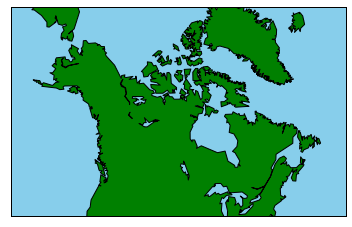

In [12]:
import matplotlib.pyplot as plt

# create Basemap instance for Lambert conformal conic projection of Canada
canada = Basemap(projection='lcc',width=8E6, height=5E6, lat_0=65, lon_0=-100)

canada.drawcoastlines() # the basemap land boundaries 
canada.fillcontinents(color='green',lake_color='skyblue') 
canada.drawmapboundary(fill_color='skyblue') # oceans
plt.show()

### 3.3 Installing with Pip
Now let's install a package using pip. When installing within a conda environment, pip should only be run with the flags `--upgrade-strategy only-if-needed` to control other packages can upgraded only if it is necessary. Let's install **seaborn** which is a python visualization library based on matplotlib.

Similar to the approach above, run try and except block below to install the package.

In [ ]:
try:
    import seaborn as sns
except ImportError:
    # Install Seaborn 
    ! pip install  --upgrade-strategy only-if-needed seaborn
    import seaborn as sns

Now, run the code block below to confirm the package is installed and works properly.

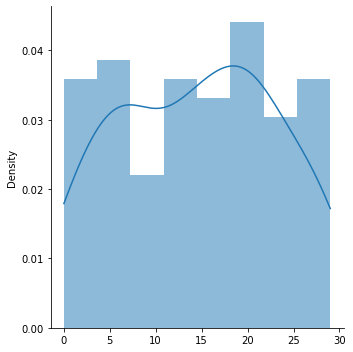

In [13]:
import numpy as np

lst = np.random.randint(0, 30, 100)
sns.displot(lst, kde=True, stat="density", linewidth=0)
plt.show()

### 3.4 Installing packages from a text file
The commands to install packages above only installed one package at a time. To use the same set of packages you require, listing them in a text file and simply installing all packages from the text file is an easy way to have a reproducible environment. 

Let's install a few helpful Geospatial packages that are not available in the environment yet. 

1. Create a text file called "geospatial_packages.txt" in the `/home/jovyan` directory (the root folder). 
2. Copy the three packages with the exact versions to be installed into this text file. 
    - `folium==0.12.0`
    - `geopy==2.1.0`
    - `lidar==0.6.1`
3. Run the command in the cell below to install the packages within the text file using conda.

In [ ]:
! conda install -c conda-forge --file /home/jovyan/geospatial_packages.txt -y

Now you should have these packages included in the notebook environment. Check by listing all the packages in the environment.

In [ ]:
! conda list

## 4. Benefits and Caveats
### Benefits:
- Bring the analytics to the data rather than requiring the data to be duplicated or moved. Jupyter-Lab is a web application that allows live code, equations, visualizations and narrative text to be mixed in a notebook and executed on computational systems that are co-located with the data.
- The Jupyer-Lab environment allows interactive data analytics to be executed without worrying about computational resources or installing software.
- Dask gateway makes it easy to configure your clusters, removing the need to deal with backend administrations. 



### Caveats:
- It is recommended to NOT install softwares or packages to your personal data storage system, the geoanalytics_{username} folder.
- The JupyterLab extension for the Dask Dashboard is only available for Dask.distributed. The Dask Dashboard for Dask Gateway can only open in a different browser tab.
- Installing new custom packages only last for the current session, so once the jupyter server is shutdown, none of the installed packages from last session will be available.